In [9]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from google.colab import drive
drive.mount('/content/drive')

path = 'drive/MyDrive/banking_dataset_train.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df = pd.read_csv(path, delimiter = ";")
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1752,46,technician,divorced,secondary,no,164,yes,no,unknown,9,may,229,2,-1,0,unknown,no
26289,36,services,married,secondary,no,11462,yes,no,cellular,20,nov,993,1,-1,0,unknown,yes
1382,28,management,single,tertiary,no,150,yes,no,unknown,8,may,491,1,-1,0,unknown,no
27124,31,management,single,tertiary,no,796,no,yes,cellular,21,nov,150,1,-1,0,unknown,no
43383,33,admin.,single,tertiary,no,7608,no,no,cellular,30,mar,238,4,-1,0,unknown,yes


# DESCRIPTIVE STATISTICS

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Observations:
- Semua tipe data sudah __sesuai__, terdapat 7 data numerik dengan tipe data "int64" dan sisanya kategorikal dengan tipe data "object".
- __Tidak terdapat__ missing value di semua variabel (semua non-null berjumlah sama dengan total entries)

In [13]:
#Pengelompokan kolom berdasarkan jenis
nums = df.select_dtypes(include='number').columns.tolist()
cats = df.select_dtypes(exclude='number').columns.tolist()

In [14]:
# Statistik dari setiap kolom numeric
df[nums].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Observations:

- Berdasarkan hasil perhitungan statistika, terdapat **perbedaan angka antara mean dan median pada kolom balance, duration, pdays, campaign, previous.** Nilai hitung rata-ratanya (mean) lebih besar nilainya bila dibandingkan dengan kuartil tengah (median), yang mengindikasikan bahwa **grafik kurva distribusi frekuensi yang terbentuk adalah menceng kanan atau kemencengan positif.**
- Dalam hal standar deviation, kolom 'balance' memiliki nilai yang besar (3044), sehingga __berpotensi adanya outliers__ yang cukup banyak. Hal ini juga mungkin karena data nya berupa __saldo nominal uang__, sehingga jarak antar nilai nominalnya besar.
- Dalam hal nilai minimum, kolom 'balance' memiliki __nilai negatif (-8019)__, yang mungkin __tidak sesuai__ untuk saldo rekening bank. Namun, hal ini mungkin disebabkan oleh overdraft atau faktor lainnya, sehingga memerlukan penyelidikan lebih lanjut.
- Kolom 'duration' memiliki nilai __minimum 0__, yang mungkin __tidak sesuai__ untuk durasi panggilan. Hal ini mungkin menunjukkan panggilan yang terlewat atau masalah lain, sehingga memerlukan penyelidikan lebih lanjut.
- Kolom pdays memiliki nilai __minimum -1__, menurut sumber informasi data, nilai tersebut merupakan representasi __nasabah yang belum pernah dihubungi__ di campaign sebelumnya.

In [15]:
# Statistik dari setiap kolom categorical
df[cats].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


### Observations:
- Berdasarkan observasi kolom-kolom categorical, kebanyakan dari nasabah bank adalah **orang yang memiliki pekerjaan “blue-collar” atau para pekerja kasar, yang sudah menikah dengan pendidikan menengah.**
- Para nasabah tersebut sebagian besar **memiliki pinjaman rumah, yang dapat dihubungi lewat telepon seluler.** Namun, sebagian besar dari para nasabah tersebut **tidak mendepositkan uang mereka pada bank sebelumnya.**
- Dalam hal unique data, __tidak ada__ data yang terlalu beragam (karena tidak ada data id), sehingga masih bagus untuk digunakan semua.
- Dalam hal frequency, variabel __'default'__ memiliki jumlah nilai "no" yang terlalu banyak, __timpang__ dengan nilai "yes" nya, hal ini juga terjadi pada variabel 'month', 'poutcome' dan 'y' yang cukup ada ketimpangan data.

In [16]:
#missing value dalam bentuk percentage
df.isna().sum()/len(df)*100


age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

__Tidak ada missing value__, sehingga nilai persentase missing value terhadap keseluruhan data adalah 0

In [17]:
for col in cats:
    print(f'Percentage for column {col}:')
    percentages = df[col].value_counts(normalize=True) * 100
    print(percentages)
    print()


Percentage for column job:
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

Percentage for column marital:
married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64

Percentage for column education:
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64

Percentage for column default:
no     98.197341
yes     1.802659
Name: default, dtype: float64

Percentage for column housing:
yes    55.583818
no     44.416182
Name: housing, dtype: float64

Percentage for column loan:
no     83.977351
yes    16.022649
Name: loan, dtype: float64

Percentage for column contact:
cellular     64.774059


# UNIVARIATE STATISTICS

###Boxplot untuk variabel Numerik

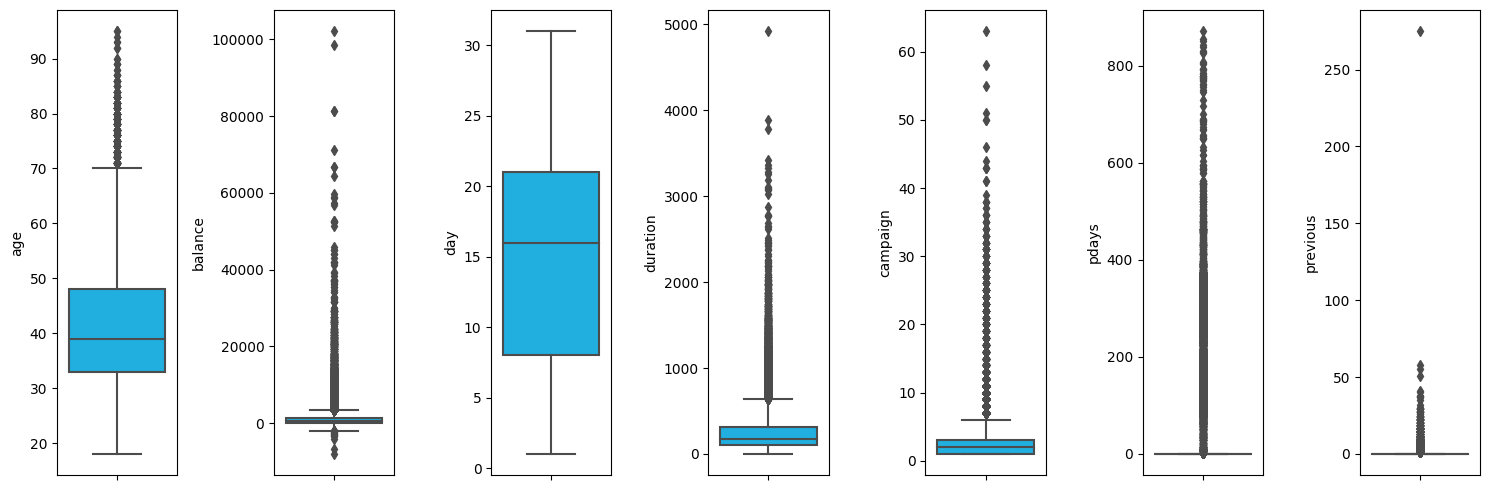

In [18]:
plt.figure(figsize=(15,5))
for i in range (0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot (y=df[nums [i]], color= 'deepskyblue',orient='v')
    plt.tight_layout()

###Observations :
<br>
- 'age' Box Plot:

Rentang usia responden antara 18 hingga 95 tahun.
Median usia responden adalah sekitar 39 tahun.
50% dari keseluruhan data __terpusat pada usia antara 33 hingga 48 tahun__.
Distribusi usia cenderung __normal__ tanpa adanya outlier yang signifikan.

Data ini cukup __bagus__ untuk digunakan dalam tahap pre-processing.
<br>
<br>
- 'balance' Box Plot:

Saldo rekening responden memiliki variasi yang sangat besar, dengan rentang dari -8019 hingga 102127.
Median saldo rekening adalah sekitar 448.
Sebagian besar responden memiliki saldo rekening di bawah 1428.
Terdapat outlier yang ekstrim pada sisi atas distribusi, menunjukkan adanya beberapa responden dengan saldo rekening yang sangat tinggi.
Secara keseluruhan, data ini memiliki outliers yang sangat ekstrim.

Saat pre-processing nanti, disarankan untuk __mengubah data minus menjadi 0__, dan __menghapus__ atau __mentransformasi__ data untuk menangani __outliers__ yang ekstrim.
<br>
<br>
- 'day' Box Plot:

Mayoritas hari terakhir responden dikontak antara __hari ke 8 hingga ke 21__.
Secara umum, distribusi data cenderung normal tanpa terlihat outliers.

Data ini cukup __bagus__ untuk digunakan dalam tahap pre-processing.
<br>
<br>
- 'duration' Box Plot:

Durasi panggilan memiliki rentang yang cukup besar, dengan rentang dari 0 hingga 4918 detik (sekitar 82 menit).
Median durasi panggilan adalah sekitar 180 detik (3 menit).
Terdapat __beberapa outlier__ ekstrem pada sisi atas distribusi, yang menunjukkan adanya panggilan dengan durasi yang sangat panjang. Outlier ini mungkin merupakan panggilan yang berlangsung sangat lama dan berbeda secara signifikan dari mayoritas panggilan lainnya.

Dalam tahap __pre-processing__, variabel ini perlu __dibersihkan__ dari beberapa __outliers yang paling ekstrim__ demi meningkatkan performa model.
<br>
<br>
- 'campaign' Box Plot:

Jumlah kontak yang dilakukan selama kampanye berkisar antara 1 hingga 63.
Median jumlah kontak adalah sekitar 2.
Terdapat beberapa outlier ekstrem pada sisi atas distribusi, menunjukkan adanya beberapa responden dengan jumlah kontak yang sangat tinggi. Outlier ini mungkin merupakan responden yang mendapatkan lebih banyak kontak daripada mayoritas responden lainnya selama kampanye.

Dalam tahap __pre-processing__, variabel ini perlu __dibersihkan__ dari beberapa __outliers yang paling ekstrim__ serta __mengganti__ nilai (-1) menjadi 0 agar lebih masuk akal demi meningkatkan performa model.
<br>
<br>
- 'pdays' Box Plot:

Jumlah hari sejak kontak terakhir dari kampanye sebelumnya memiliki variasi yang cukup besar, dengan rentang dari -1 hingga 871.
Median jumlah hari adalah -1, yang menunjukkan bahwa mayoritas responden belum pernah dikontak pada campaign sebelumnya.
Terdapat banyak outliers yang sangat ekstrim pada sisi atas distribusi, dengan beberapa outlier yang sangat tinggi (hingga 871). Hal ini menunjukkan adanya sejumlah kecil responden yang telah dikontak dalam jangka waktu yang sangat lama sejak kampanye sebelumnya.

Dalam tahap __pre-processing__, variabel ini perlu __ditransformasi__ untuk menangani beberapa __outliers yang paling ekstrim__ demi meningkatkan performa model.
<br>
<br>
- 'previous' Box Plot:

Jumlah kontak sebelum kampanye saat ini berkisar dari 0 hingga 275.
Mayoritas responden tidak memiliki kontak sebelum kampanye saat ini, seperti yang ditunjukkan oleh median yang rendah (-1).
Terdapat banyak outliers ekstrim pada sisi atas distribusi, dengan beberapa outlier yang sangat tinggi (hingga 275). Hal ini menunjukkan adanya sejumlah kecil responden yang telah memiliki banyak kontak sebelum kampanye saat ini.

Dalam tahap __pre-processing__, variabel ini perlu __dibersihkan__ dari sedikit __outliers yang paling mencolok__ di sisi paling atas distribusi demi meningkatkan performa model.



### Histogram Plot untuk Variabel Numerik

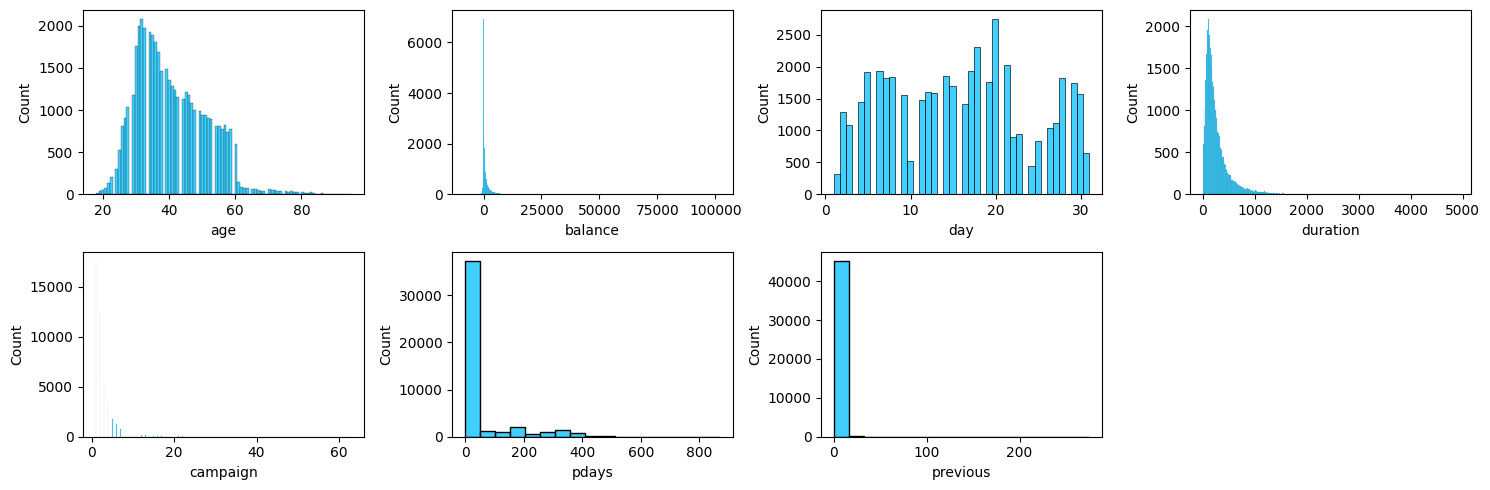

In [19]:
plt.figure(figsize=(15,5))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.histplot(x=df[nums[i]], color='deepskyblue')
    plt.xlabel(nums[i])
    plt.tight_layout()

###Observations :
<br>

- Kolom "age":

Distribusi umur tampaknya cukup __normal__, tidak ada indikasi skewness yang signifikan.

__Tidak ada__ tindakan khusus yang perlu diambil dalam data pre-processing untuk kolom ini.
<br>
<br>
- Kolom "balance":

Distribusi saldo tampaknya sangat skew ke kanan (positively skewed) dengan nilai maksimum yang jauh lebih tinggi dan sangat timpang dari nilai-nilai lainnya. Hal ini menunjukkan banyaknya outlier bernilai besar yang mempengaruhi distribusi data.

Saat melakukan __pre-processing__ data, dapat dilakukan __penghapusan__ outlier yang berada di luar kisaran nilai yang masuk akal dengan menentukan batasan atas dan bawah atau melakukan __transformasi data__ (log transformation), atau bisa juga menggunakan __IQR__.
<br>
<br>
- Kolom "day":

Distribusi kolom ini terlihat sedikit multi-modal, namun tidak begitu signifikan.

__Tidak ada__ tindakan khusus yang perlu diambil dalam data pre-processing untuk kolom ini.
<br>
<br>
- Kolom "duration":

Distribusi durasi panggilan juga sangat __skew ke kanan__, dengan nilai maksimum yang jauh lebih tinggi dari nilai-nilai lainnya.

Saat melakukan pre-processing data, perlu diperhatikan penanganan outlier, seperti __transformasi data__ (misalnya log transform) atau penggunaan teknik __penggantian outlier__ (misalnya menggunakan batas atas atau bawah yang relevan).
<br>
<br>
- Kolom "campaign":

Distribusi jumlah panggilan kampanye cenderung __positively skewed__, dengan sebagian besar nasabah menerima panggilan dalam jumlah yang sedikit. Terdapat nilai maksimum yang jauh lebih tinggi dari nilai-nilai lainnya, menunjukkan adanya beberapa nasabah yang menerima panggilan kampanye dalam jumlah yang sangat banyak.

Saat melakukan pre-processing data, perlu diperhatikan penanganan outlier pada data distribusi atas, seperti __transformasi data__ (misalnya log transform) atau penggunaan teknik __penggantian outlier__ (misalnya menggunakan batas atas atau bawah yang relevan).
<br>
<br>
- Kolom "pdays":

Distribusi nilai pdays sangat __skew ke kanan__, dengan sebagian besar nilai berada pada __-1 (non-called)__.

Saat melakukan __pre-processing__ data, nilai -1 dapat __diganti__ dengan nilai yang lebih bermakna seperti 0 untuk menandai klien yang tidak pernah dihubungi sebelumnya.
<br>
<br>
- Kolom "previous":

Distribusi jumlah kontak sebelum kampanye saat ini juga sangat __skew ke kanan__, dengan nilai maksimum (275) yang jauh lebih tinggi dari nilai-nilai lainnya.

Saat melakukan __pre-processing data__, dapat dilakukan __penghapusan__ outlier yang berada di luar kisaran nilai yang masuk akal.

### Barplot untuk Variabel Kategorikal

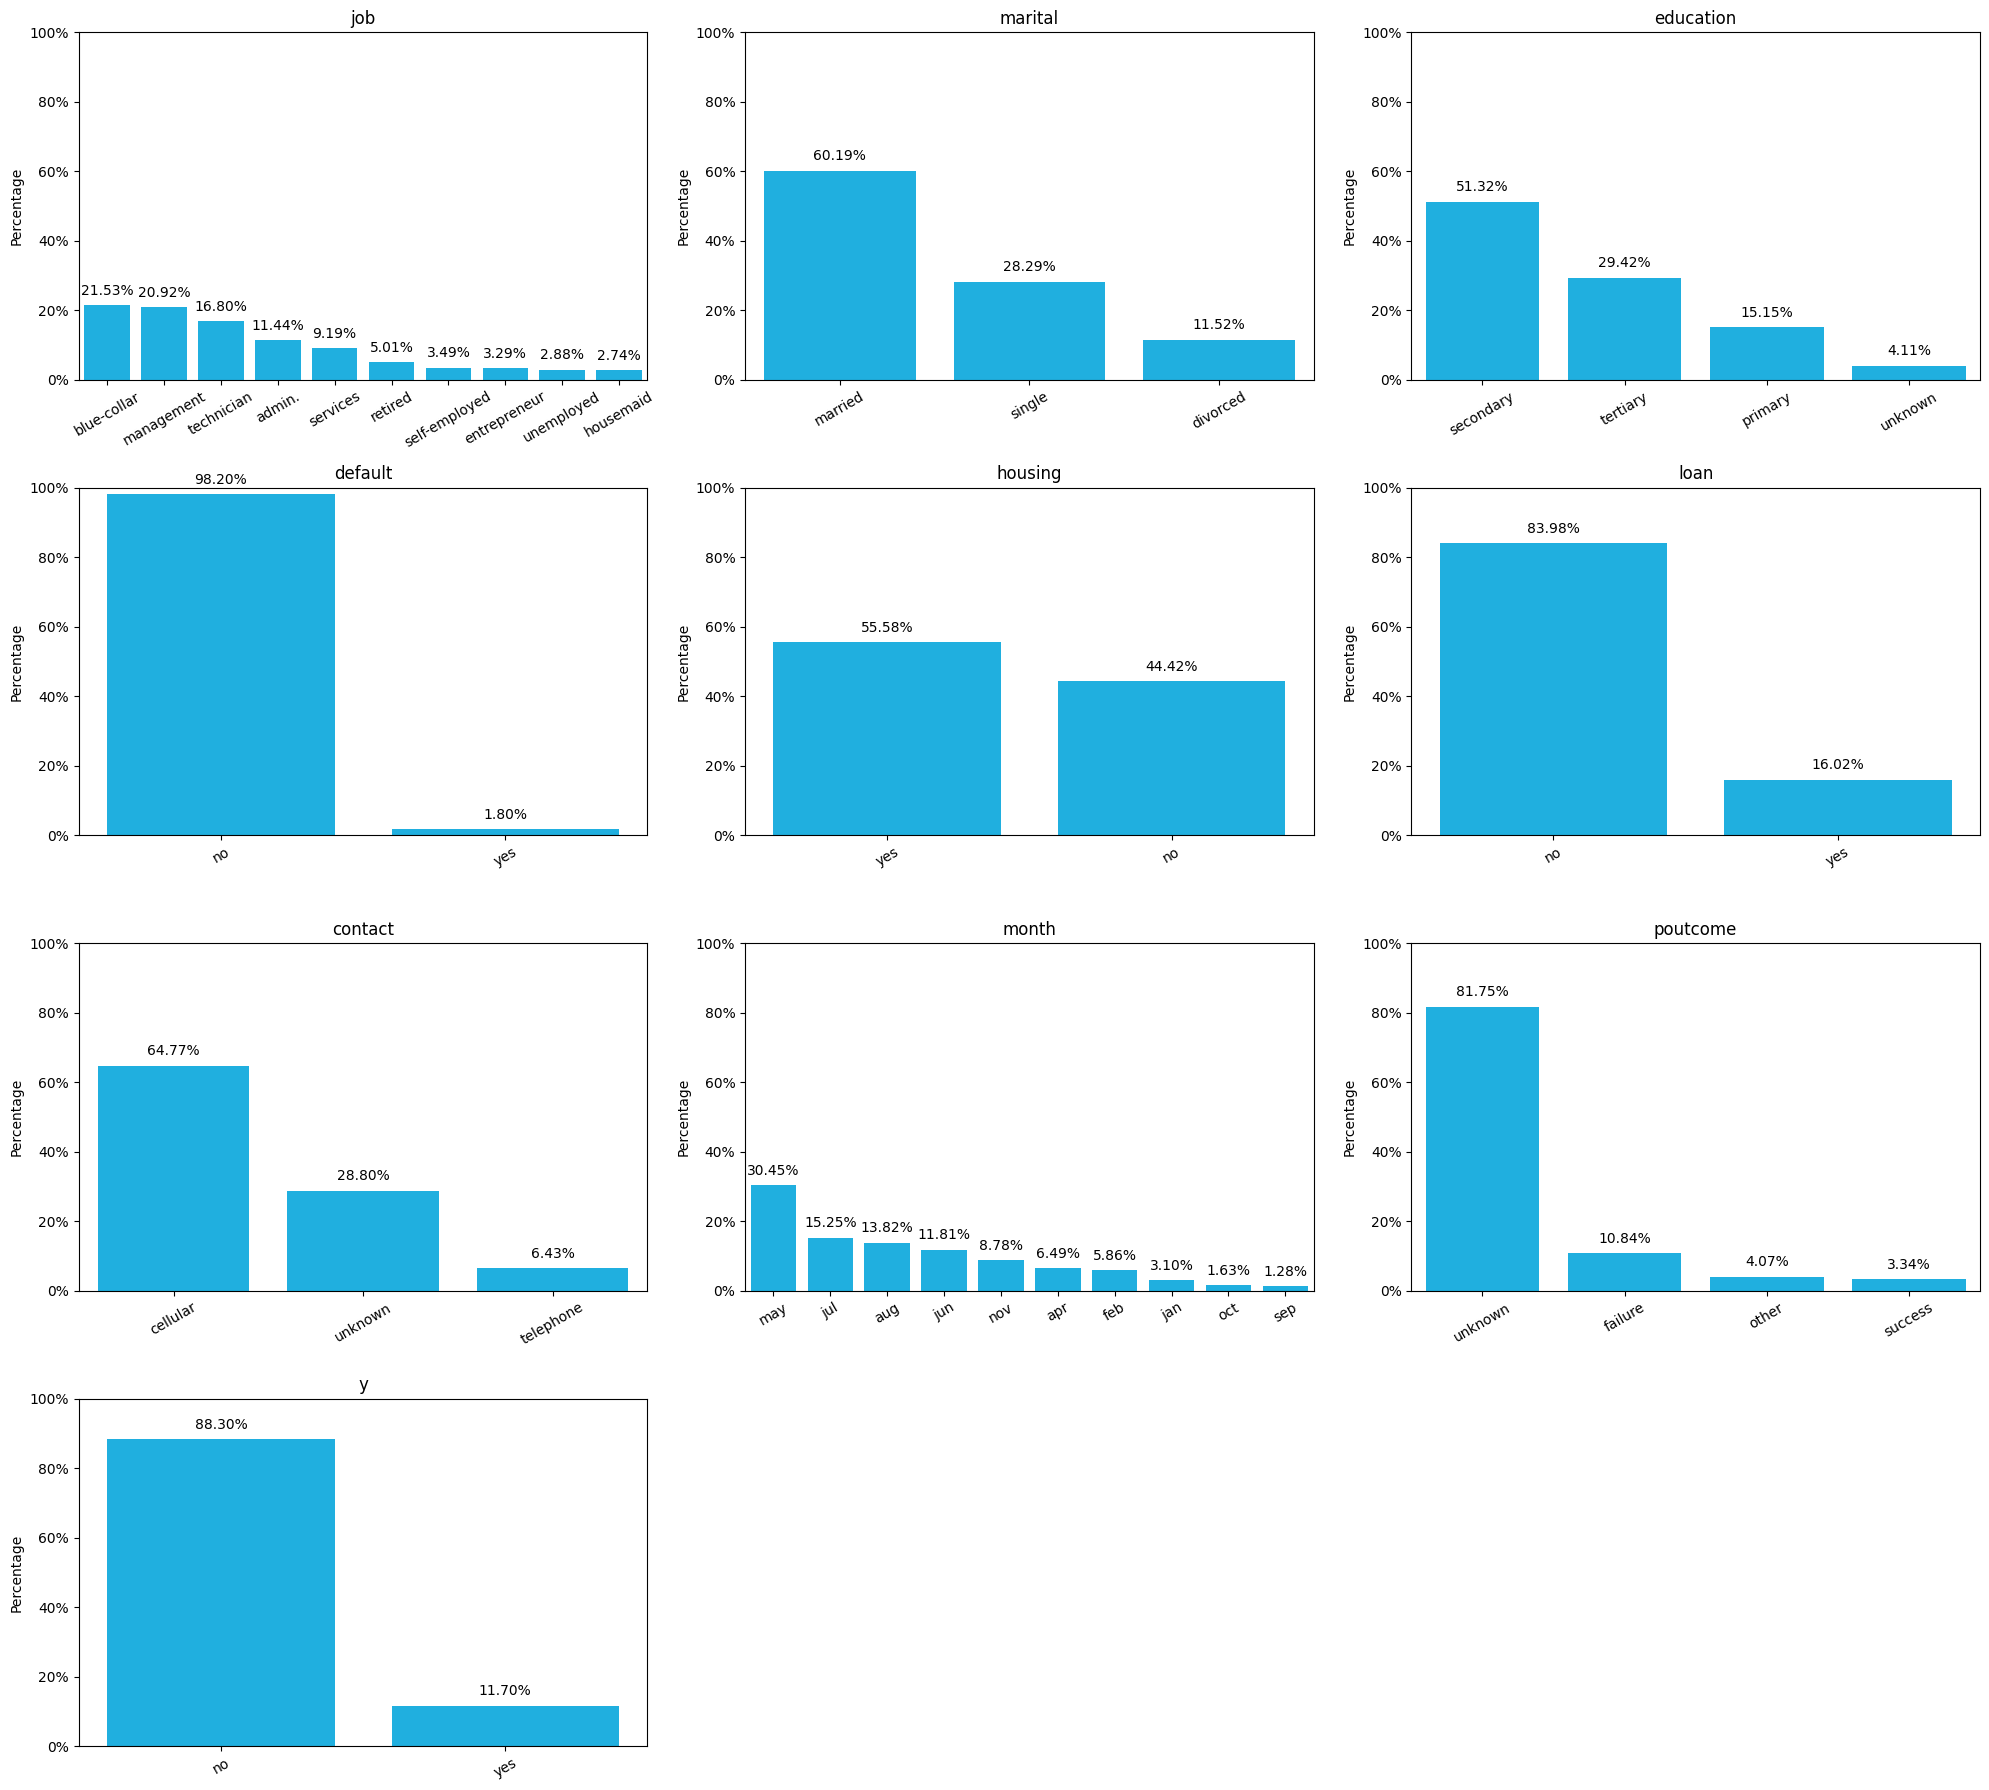

In [20]:
import matplotlib.ticker as mtick
plt.figure(figsize=(20, 18))
for i, col in enumerate(cats, 1):
    plt.subplot(4, 3, i)
    percentages = (df[col].value_counts() / len(df) * 100)[:10]
    ax = sns.barplot(x=percentages.index, y=percentages.values, color='deepskyblue')
    ax.set_title(col)
    ax.set_ylabel('Percentage')
    ax.set_ylim(0, 100)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.xticks(rotation=30)

    for p, percentage in zip(ax.patches, percentages.values):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.2f}%'.format(percentage), ha='center')

plt.tight_layout()
plt.show()

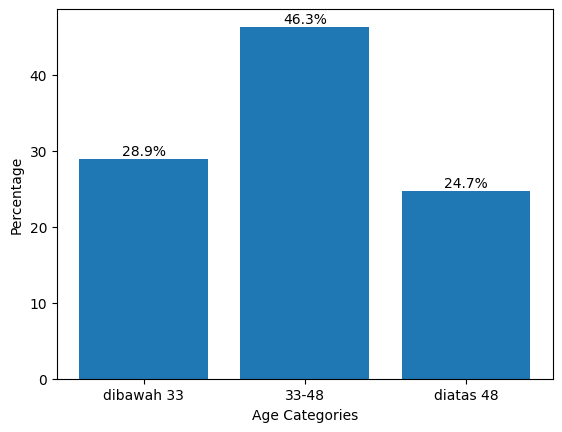

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Ambil data kolom "age"
ages = df['age']

# Tentukan batas-batas bin
bins = [0, 33, 48, float('inf')]

# Bagi data menjadi tiga kategori
age_categories = pd.cut(ages, bins, labels=['dibawah 33', '33-48', 'diatas 48'])
age_counts = age_categories.value_counts()
total_respondents = len(df)
age_percentages = age_counts / total_respondents * 100

# Mengurutkan berdasarkan labels
age_percentages = age_percentages.sort_index()

# Membuat barplot
plt.bar(age_percentages.index, age_percentages)

# Menambahkan persentase nilai di setiap bar
for i, percentage in enumerate(age_percentages):
    plt.text(i, percentage + 0.5, f'{percentage:.1f}%', ha='center')

# Menambahkan label sumbu x dan y
plt.xlabel('Age Categories')
plt.ylabel('Percentage')

# Menampilkan plot
plt.show()

###Observations :
<br>
- Variabel "job":

Pekerjaan __Blue-collar dan management__ berturut-turut menjadi pekerjaan yang paling umum, sedangkan pekerjaan Housemaid dan unemployed (pengangguran) merupakan minoritas bagi nasabah Bank disini.

Namun, hal tersebut tidak jadi masalah saat pre-processing, sehingga __tidak perlu tindakan khusus__.
<br>
<br>
- Variabel "marital":

Mayoritas nasabah dalam dataset ini adalah yang __sudah menikah (60.19%)__ sedangkan yang paling sedikit adalah nasabah yang telah bercerai atau janda.

Namun, hal tersebut tidak jadi masalah saat pre-processing, sehingga __tidak perlu tindakan khusus__.
<br>
<br>

*   Variabel "education":

Setengah dari keseluruhan nasabah memiliki pendidikan terakhir pada __tingkat secondary__ (biasanya setingkat SMA). Namun, persentase paling kecil nasabah adalah yang tingkat pendidikannya tidak diketahui (unknown).

Namun, hal tersebut tidak jadi masalah saat pre-processing, sehingga __tidak perlu tindakan khusus__.
<br>
<br>
- Variabel "default":

Hampir semua nasabah disini (98.20%) __tidak memiliki masalah default__ pada pinjaman atau kredit macet.

Namun, hal tersebut tidak jadi masalah saat pre-processing, sehingga __tidak perlu tindakan khusus__.
<br>
<br>
- Variabel "housing":

Lebih dari setengah nasabah (55.58%) __memiliki KPR__ (housing loan).

Namun, hal tersebut tidak jadi masalah saat pre-processing, sehingga __tidak perlu tindakan khusus__.
<br>
<br>
- Variabel "loan":

Mayoritas responden (83.98%) __tidak memiliki pinjaman__ pribadi.

Namun, hal tersebut tidak jadi masalah saat pre-processing, sehingga __tidak perlu tindakan khusus__.
<br>
<br>
- Variabel "contact":

Sebagian besar kontak yang dilakukan oleh marketer dilakukan melalui __panggilan seluler (64.77%)__.
Sekitar 28.80% nasabah dikontak menggunakan metode yang tidak diketahui (unknown).
Kontak panggilan melalui telepon rumah menjadi yang paling sedikit dilakukan marketer.

Namun, hal tersebut tidak jadi masalah saat pre-processing, sehingga __tidak perlu tindakan khusus__.
<br>
<br>
- Variabel "month":

Kontak terakhir yang dilakukan marketer kepada nasabah pada tahun tersebut paling banyak dilakukan pada __bulan Mei (30.45%)__ atau pertengahan kuartal II.

Saat data pre-processing, pertimbangkan untuk __menggabungkan__ bulan-bulan ke dalam kategori yang lebih luas (misalnya musim atau kuartal) untuk analisis atau pemodelan yang lebih baik.
<br>
<br>
- Variabel "poutcome":

Sebagian besar hasil pemasaran sebelumnya __tidak diketahui (unknown) (81.75%)__ sedangkan hasil sukses memberikan jumlah yang paling sedikit.

Namun, hal tersebut tidak jadi masalah saat pre-processing, sehingga __tidak perlu tindakan khusus__.
<br>
<br>
- Variabel "y":

Mayoritas nasabah (88.30%) __tidak berlangganan__ deposito berjangka pada periode sebelumnya.

Saat data pre-processing, memastikan pemrosesan kelas target yang tepat saat membangun model, seperti __mengubah__ nilai "yes" menjadi 1 dan "no" menjadi 0, selanjutnya berdasarkan data yang __imbalanced__, perlu dipertimbangkan juga untuk melakukan __undersampling__.

- Variabel "age segmentation":

Mayoritas (46%) responden berada di rentang umur **33-48 tahun**.

Namun, hal tersebut tidak jadi masalah saat pre-processing, sehingga __tidak perlu tindakan khusus__.

# MULTIVARIATE ANALYSIS

## Hubungan antar Variabel Numerik

In [22]:
df.corr()

<ipython-input-22-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


### Correlation Heatmap

<ipython-input-23-b10202ae2df4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True,  fmt='.2f')


<Axes: >

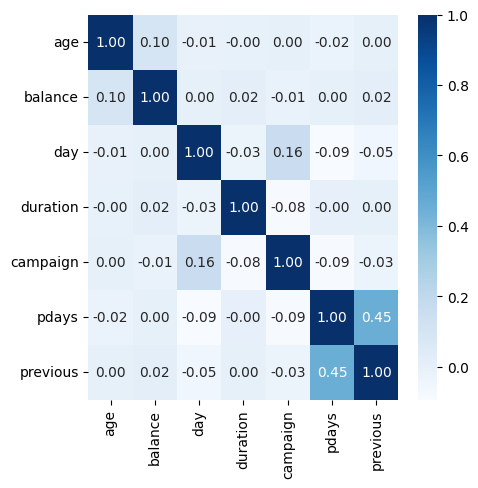

In [23]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), cmap='Blues', annot=True,  fmt='.2f')
#perlu make sure multi kolinearitas (hub antar var x)

###Observations :
- Berdasarkan heatmap korelasi untuk feature numerik di atas, terlihat bahwa feature 'pdays' dan 'previous' memiliki korelasi yang masuk dalam kategori __moderate correlation (0.45)__.
- Selain korelasi 2 feature yang telah disebutkan, sisanya berkorelasi lemah atau sangat lemah.

###Tindak Lanjut :
- Feature __'pdays'__ dipertimbangkan untuk __tidak dimasukkan__ dalam analisis sedangkan feature __'previous' dipertahankan__. Hal ini karena dari sisi persebaran data, 'pdays' memiliki banyak __outliers__ yang lebih ekstrim, memiliki nilai __mayoritas -1__ (kurang relevan untuk merepresentasikan nasabah yang belum pernah dihubungi) dan juga memiliki __standar deviasi__ yang sangat besar ketimbang 'previous'.
- Feature __'duration'__ juga __dipertimbangkan untuk tidak dimasukkan__ dalam analisis dikarenakan banyaknya nasabah yang belum pernah dihubungi di campaign sebelumnya sehingga __banyak nilai 0__, namun ini butuh __penyelidikan lebih lanjut__.


### __Scatter Plot__ untuk melihat hubungan antar variabel Numerik dan Label (Target)

<Figure size 1500x1500 with 0 Axes>

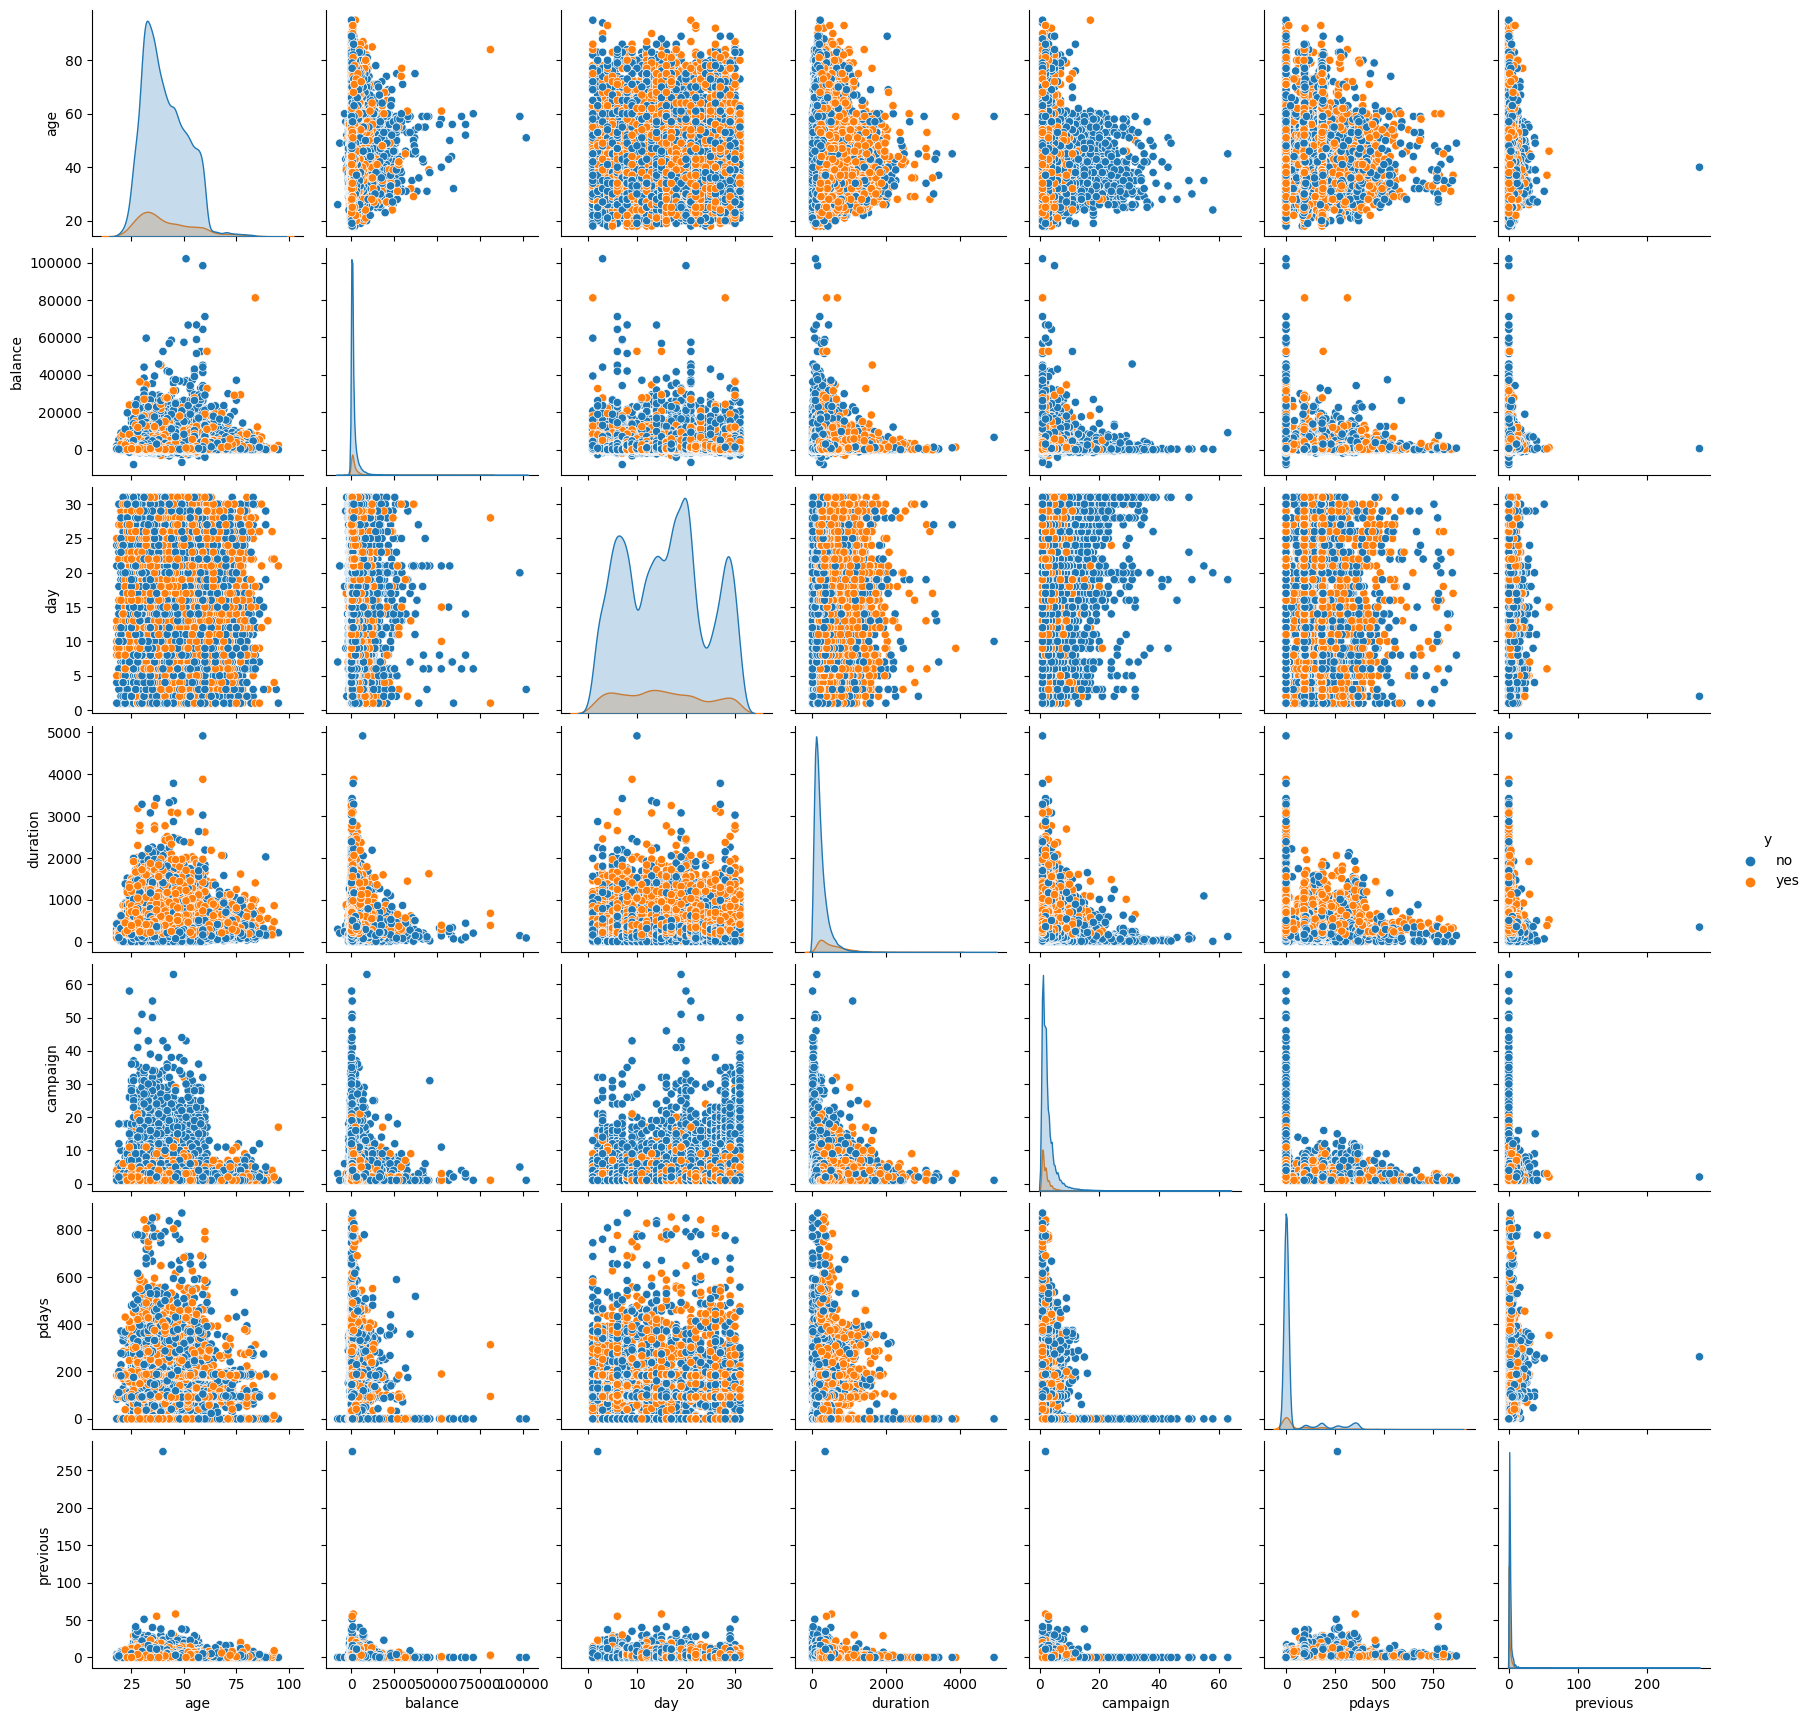

In [24]:
plt.figure(figsize=(15,15))
sns.pairplot(df, diag_kind='kde', hue='y')


###Observation :
- pada hubungan feature __'age' dan 'duration'__, terlihat ada pola yang __menarik__ dimana rata-rata nasabah yang __tidak deposit__ memiliki nilai __durasi yang rendah__, sedangkan semakin lama durasi, kemungkinan deposit menjadi semakin tinggi tidak peduli berapapun __usianya__.
- Hubungan feature __'day' dan 'duration'__ juga mirip dengan yang di atas, dimana __semakin lama durasi__ semakin __tinggi__ kemungkinan __nasabah untuk deposit__ tidak peduli di __hari apa__ kontak terakhir dilakukan.
- Hubungan feature __'age' dan 'campaign'__ juga memiliki pola yang sedikit __menarik__, dimana semakin __banyak campaign__ atau kontak yang dilakukan justru kecenderungan nasabah untuk berlangganan deposit berjangka __semakin kecil__ tidak peduli berapapun __usia__ nasabah.
- Sisanya tidak menunjukkan hubungan dan pola yang menarik terhadap label.

###Tindak Lanjut :
- Selain feature 'pdays' yang kemungkinan di __buang__ dan 'duration' yang akan __dipertimbangkan__ lebih lanjut, sisanya cukup relevan untuk dipertahankan.



###__Stacked Bar Chart__ untuk melihat hubungan variabel kategorikal dengan Label (Target)

####  Functions untuk pivot table dan display stacked bar chart (keep hidden recommended)

In [25]:
## Untuk pivot yang ada nominalnya
def pivot_table(c):
    categorical_pivot = {}
    for i in c:
        pivot_temp = pd.pivot_table(df,
                           index = [i],
                           columns=['y'],
                           aggfunc = {i : "count"}
                          ).reset_index()
        pivot_temp.columns = [i.capitalize(), "Do not deposit", "Deposit"]
        pivot_temp["Deposit"].sum()+pivot_temp["Do not deposit"].sum()
        pivot_temp["Percent who deposit"] = (pivot_temp["Deposit"]/(pivot_temp["Deposit"]+pivot_temp["Do not deposit"])*100)
        pivot_temp["Percent who don't deposit"] = (pivot_temp["Do not deposit"]/(pivot_temp["Deposit"]+pivot_temp["Do not deposit"])*100)
        pivot_temp=pivot_temp.set_index(i.capitalize())
        categorical_pivot[i]=pivot_temp

    return categorical_pivot
# pivot yang hanya persentase
def pivot_table_percent_only(c):
    categorical_pivot = {}
    for i in c:
        pivot_temp = pd.pivot_table(df,
                           index = [i],
                           columns=['y'],
                           aggfunc = {i : "count"}
                          ).reset_index()
        pivot_temp.columns = [i.capitalize(), "0", "1"]
        pivot_temp["1"].sum()+pivot_temp["0"].sum()
        pivot_temp["Percent who deposit"] = (pivot_temp["1"]/(pivot_temp["1"]+pivot_temp["0"]))
        pivot_temp["Percent who don't deposit"] = (1-pivot_temp["Percent who deposit"])
        pivot_temp = pivot_temp.drop(columns=["0","1"]).set_index(i.capitalize())
        categorical_pivot[i]=pivot_temp

    return categorical_pivot

# buat display semua pivot table
def display_pivots(b):
    for x,y in b.items():
      if x!='y':
        print(f'{x.capitalize()} and Y relationship \n')
        display(y)
      else:
        continue
# buat display satu pivot table
def display_single_pivot(p1):
    display(p1)

# buat plot semua pivot di stacked bar plot
def plot_pivots(b):
    for x,y in b.items():
      if x!='y':
        y.plot(kind='bar', stacked=True)
      else:
        continue
# buat plot satu pivot di stacked bar plot
def plot_one_pivot(p1):
    p1.plot(kind='bar', stacked=True)

#### Pivot Tables

In [26]:
cats_pivot = pivot_table(cats)

display_pivots(cats_pivot)

Job and Y relationship 



,Do not deposit,Deposit,Percent who deposit,Percent who don't deposit
Job,,,,
admin.,4540,631,12.202669,87.797331
blue-collar,9024,708,7.274969,92.725031
entrepreneur,1364,123,8.271688,91.728312
housemaid,1131,109,8.790323,91.209677
management,8157,1301,13.755551,86.244449
retired,1748,516,22.791519,77.208481
self-employed,1392,187,11.842939,88.157061
services,3785,369,8.883004,91.116996
student,669,269,28.678038,71.321962


Marital and Y relationship 



,Do not deposit,Deposit,Percent who deposit,Percent who don't deposit
Marital,,,,
divorced,4585,622,11.945458,88.054542
married,24459,2755,10.123466,89.876534
single,10878,1912,14.949179,85.050821


Education and Y relationship 



,Do not deposit,Deposit,Percent who deposit,Percent who don't deposit
Education,,,,
primary,6260,591,8.626478,91.373522
secondary,20752,2450,10.559435,89.440565
tertiary,11305,1996,15.006390,84.993610
unknown,1605,252,13.570275,86.429725


Default and Y relationship 



,Do not deposit,Deposit,Percent who deposit,Percent who don't deposit
Default,,,,
no,39159,5237,11.796108,88.203892
yes,763,52,6.380368,93.619632


Housing and Y relationship 



,Do not deposit,Deposit,Percent who deposit,Percent who don't deposit
Housing,,,,
no,16727,3354,16.702355,83.297645
yes,23195,1935,7.699960,92.300040


Loan and Y relationship 



,Do not deposit,Deposit,Percent who deposit,Percent who don't deposit
Loan,,,,
no,33162,4805,12.655727,87.344273
yes,6760,484,6.681391,93.318609


Contact and Y relationship 



,Do not deposit,Deposit,Percent who deposit,Percent who don't deposit
Contact,,,,
cellular,24916,4369,14.918900,85.081100
telephone,2516,390,13.420509,86.579491
unknown,12490,530,4.070661,95.929339


Month and Y relationship 



,Do not deposit,Deposit,Percent who deposit,Percent who don't deposit
Month,,,,
apr,2355,577,19.679400,80.320600
aug,5559,688,11.013286,88.986714
dec,114,100,46.728972,53.271028
feb,2208,441,16.647792,83.352208
jan,1261,142,10.121169,89.878831
jul,6268,627,9.093546,90.906454
jun,4795,546,10.222805,89.777195
mar,229,248,51.991614,48.008386
may,12841,925,6.719454,93.280546


Poutcome and Y relationship 



,Do not deposit,Deposit,Percent who deposit,Percent who don't deposit
Poutcome,,,,
failure,4283,618,12.609671,87.390329
other,1533,307,16.684783,83.315217
success,533,978,64.725347,35.274653
unknown,33573,3386,9.161503,90.838497


#### Stacked Bar Chart

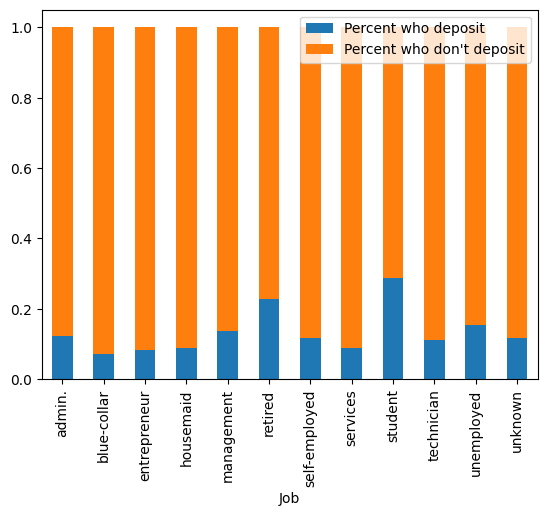

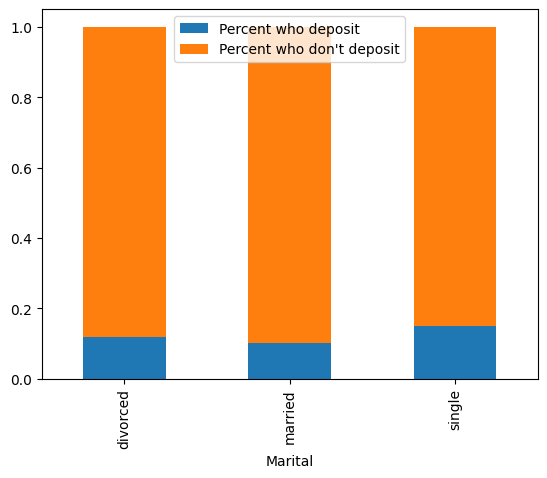

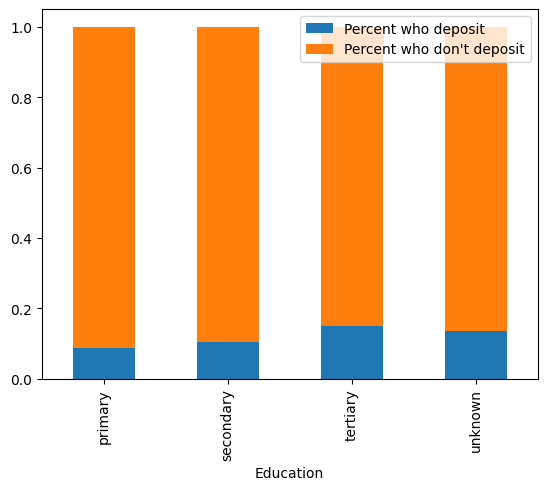

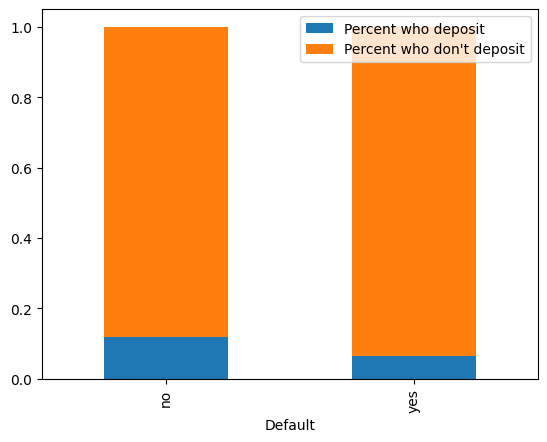

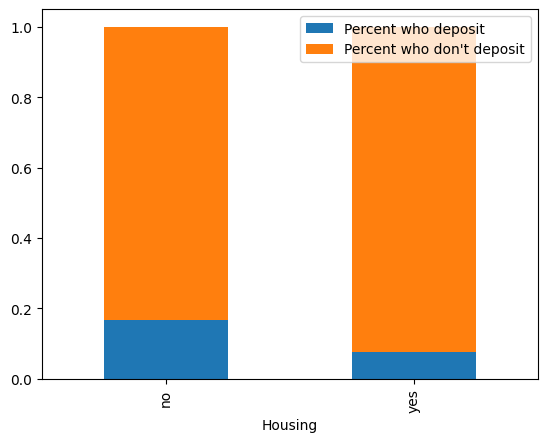

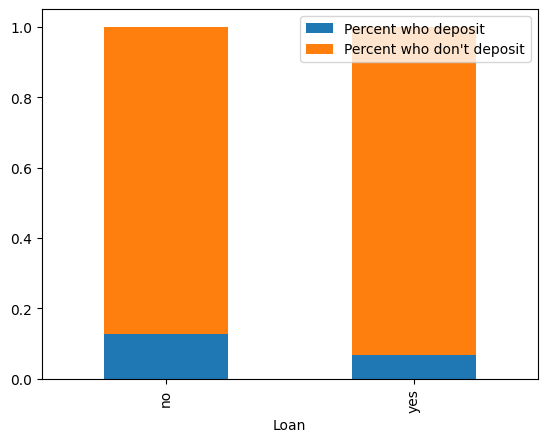

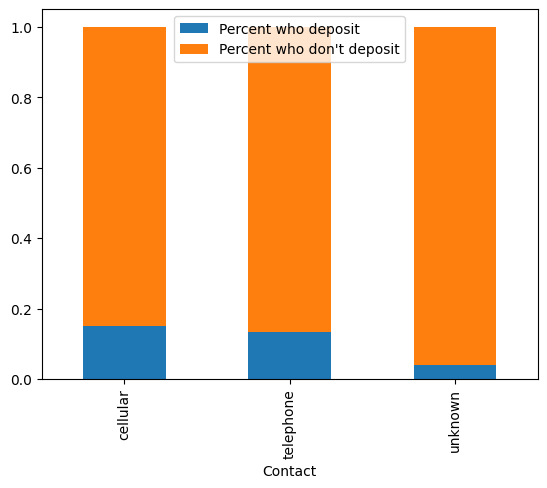

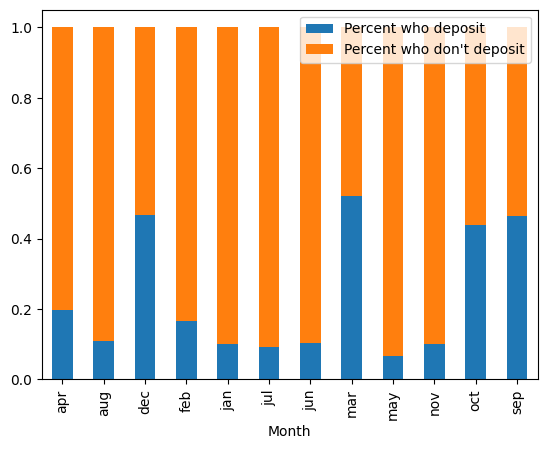

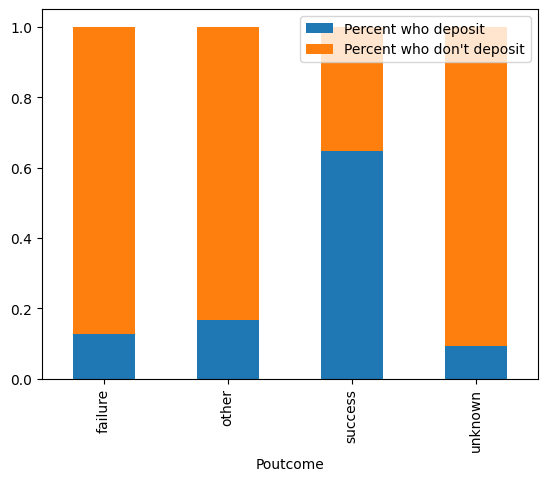

In [27]:
#cats_pivots=pivot_table(cats)
cats_pivots_pct = pivot_table_percent_only(cats)
#display_pivots(cats_pivots_pct)

plot_pivots(cats_pivots_pct)

###Observations :
<br>

- Feature __'Job'__

Secara conversion rate, nasabah yang berkesibukan sebagai __pelajar__ memiliki persentase ketertarikan __tertinggi__ untuk berlangganan deposito. Hal ini mungkin karena berlangganan deposito menjadi target yang ingin dilakukan saat pertama kali membuka rekening di bank (mungkin berpikir untuk investasi sejak dini). Ini juga berarti peluang untuk nasabah pelajar untuk convert adalah yang tertinggi. Untuk retired juga persentasenya kedua tertinggi, hal ini mungkin nasabah menyimpan tabungan pensiunnya pada deposito berjangka.
<br>
<br>
- Feature __'Marital'__

Jika dilihat dari marital status, nasabah dengan status __‘single’__ memiliki persentase __paling tinggi__ meskipun tidak begitu jauh dibanding yang lain, mungkin karena banyak dari nasabah single memiliki __spare uang__ lebih untuk bisa di investasikan. Namun, perbedaan conversion rate tidak terlihat signifikan.
<br>
<br>
- Feature __'Education'__

Jika dilihat dari conversion ratenya, maka dapat disimpulkan bahwa semakin tinggi pendidikan nasabah, peluang convertnya juga semakin tinggi __(Tertiary atau biasanya tingkat perguruan tinggi)__. Pendidikan terakhir yang tinggi juga dapat mencerminkan stabilitas keuangan dan minat yang lebih besar dalam produk atau layanan yang ditawarkan, yang pada akhirnya dapat meningkatkan kemungkinan nasabah untuk melakukan tindakan konversi. Hal tersebut mungkin karena semakin tinggi pendidikan formal, semakin tinggi pula iterasi keuangan seseorang.
<br>
<br>
- Feature __'Default'__

Nasabah yang __tidak memiliki masalah__ dengan default atau kredit macet lebih banyak yang __berlangganan deposit__ ketimbang yang terkena masalah. Hal ini mungkin karena mereka memiliki stabilitas keuangan yang lebih baik.
<br>
<br>
- Feature __'Housing'__

Nasabah yang __belum pernah mengajukan KPR__ cenderung __lebih banyak__ berlangganan produk deposit. Ini karena nasabah yang tidak mengajukan KPR cenderung memiliki spare dana untuk berlangganan deposito berjangka. Persentase konversi nasabah yang tidak memiliki KPR juga memiliki nilai lebih dari 2 kali lipat dari yang punya KPR.
<br>
<br>

- Feature __'loan'__

Senada dengan faktor KPR, nasabah yang __belum pernah__ mengajukan pinjaman pribadi juga __lebih tinggi__ persentase berlangganannya. Hal ini juga karena spare dana lebih banyak jika tidak memiliki pinjaman lain. Perbedaan persentase yang tidak punya pinjaman juga hampir 2 kali lipat nasabah yang memiliki pinjaman.
<br>
<br>
- Feature __'contact'__

Jenis kontak melalui __seluler__ memiliki __persentase tertinggi__ meskipun tidak berbeda jauh dengan telepon, namun perbedaan cukup signifikan dibandingkan dengan metode lain atau unknown.
<br>
<br>
- Feature __'month'__

Bulan maret menjadi bulan terakhir kontak yang dilakukan dengan hasil konversi berlangganan yang tertinggi. Bulan September, Oktober dan Desember juga cukup tinggi. Sisanya rendah.
<br>
<br>
- Feature __'Poutcome'__

Hasil __sukses__ pada campaign terakhir tentu menjadi tanda yang sesuai dengan __paling banyaknya__ nasabah yang berlangganan, unggul jauh dari hasil lainnya.





## __Business Insight & Recommendation__

1. **Segmentasi dan Personalisasi.**
   - Fitur age dan balance menunjukkan korelasi positif dan memiliki dampak signifikan terhadap variabel target (y), mengindikasikan bahwa kelompok pelanggan yang lebih tua dan memiliki saldo lebih tinggi lebih cenderung berlangganan deposito berjangka.
   - Recommendation: Targetkan upaya marketing kepada kelompok pelanggan yang lebih tua dan memiliki saldo rekening yang lebih tinggi. Identifikasi karakteristik khusus dari kelompok ini seperti preferensi investasi atau tujuan keuangan, kemudian dari hasil identifikasi tersebut kita dapat memberikan penawaran yang lebih personal untuk mendorong mereka berlangganan deposito berjangka dengan tingkat bunga yang lebih menarik.

2. **Analisis Mendalam Durasi Panggilan.**
   - Fitur duration memiliki korelasi positif yang kuat dengan variabel target (y), menunjukkan bahwa durasi panggilan yang lebih lama lebih mungkin atau cenderung berlangganan deposito berjangka).
   - Recommendation: Fokuskan pada peningkatan kualitas dan efektivitas interaksi pelanggan selama panggilan. Lakukan analisis lebih lanjut untuk mengidentifikasi faktor-faktor spesifik dalam durasi panggilan yang berkontribusi pada keberhasilan, buatlah guidelines dan skenario interaksi pelanggan yang berfokus pada elemen-elemen yang telah terbukti berhasil. Kemudian latih tim sales dengan skenario ini agar pelanggan dapat membuat keputusan yang terinformasi tentang berlangganan deposito berjangka.

3. **Analisis Musiman dan Pengoptimalan Metode Kontak.**
   - Fitur month menunjukkan pola menarik, dengan beberapa bulan memiliki tingkat langganan yang lebih tinggi atau lebih rendah. Selain itu, fitur contact mengindikasikan metode kontak yang digunakan.
   - Recommendation:
   1. Ekstrapolasi analisis bulan-bulan dengan tingkat langganan yang lebih tinggi. Misalnya, apakah ada peristiwa tertentu atau trend ekonomi yang terkait dengan peningkatan langganan pada bulan-bulan tertentu?. Kemudian pertimbangkan untuk menyesuaikan strategi marketing dan alokasi sumber daya untuk lebih efektif menargetkan bulan-bulan tersebut.
   2. Evaluasi efektivitas metode kontak yang digunakan. Selain itu, coba eksplorasi lebih lanjut tentang preferensi komunikasi pelanggan dalam berbagai segmen dengan cara survei atau wawancara dengan pelanggan untuk memahami metode kontak yang paling nyaman dan efektif bagi mereka. Kemudian implementasikan strategi rotasi metode kontak berdasarkan preferensi pelanggan dan hasil dari analisis conversion rate. Hal ini dapat membantu menghindari jenuhnya pelanggan dengan satu metode kontak dan dapat meningkatkan conversion opportunities.
   

### CATEGORICAL VS NUMERICAL PLOT

In [28]:
nums

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [29]:
cats

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [30]:
def grafik(cat, a=25, b=30):
  fig = plt.figure(figsize= (a, b))
  for i in range(0, len(nums)):
    ax = fig.add_subplot(5, 2, i+1)
    sns.stripplot(data=df, ax=ax, x=cat, y=nums[i], hue=cat, legend=False)
    plt.tight_layout()

BUSINESS RECOMMENDATION (Iqbal & Ilham)


*   Berdasarkan analisis hubungan antara nasabah yang berlangganan dengan pinjaman dan KPR, bahwa marketer diharapkan bisa langsung menghubungi “hanya” nasabah yang tidak memiliki KPR dan tidak memiliki Pinjaman, karena conversion rate nya cukup signifikan lebih tinggi ketimbang yang memiliki keduanya.

*   Mengingat tingkat conversion rate pelajar yang tertinggi, bank dapat mengembangkan program atau produk yang ditujukan secara khusus kepada mereka. Misalnya, program tabungan pendidikan atau deposito berjangka khusus untuk pelajar dengan manfaat dan suku bunga yang menarik. Dalam melakukan pemasaran, bank juga dapat bekerja sama dengan institusi pendidikan atau mengadakan kegiatan yang relevan dengan kebutuhan dan minat pelajar.

*   Marketer bisa mencoba memaksimalkan untuk menghubungi nasabah pada bulan Maret, September, Oktober dan Desember, karena memiliki conversion rate yang secara signifikan lebih tinggi ketimbang bulan lainnya. (hubungi di periode sebelumnya)

*   Dari ke 4 bulan yang direkomendasikan di atas, dengan jumlah rata-rata conversion rate 47%, dibandingkan dengan total percobaan sebanyak 42.511 sepanjang tahun, maka marketer disarankan menghubungi maksimal hanya sebanyak 21.356 nasabah (47% dari total percobaan) saja dan fokus di 4 bulan tersebut.

*   Marketer bisa mencoba memaksimalkan untuk menghubungi dan menawarkan layanan eksklusif, seperti penawaran suku bunga yang lebih baik bagi deposito jangka panjang nasabah dengan status pendidikan yang tinggi (diatas primary education) untuk lebih memaksimalkan conversion rate nasabah.











## Business Insight & Recommendation

1. **Segmentasi dan Personalisasi.**
   - Fitur age dan balance menunjukkan korelasi positif dan memiliki dampak signifikan terhadap variabel target (y), mengindikasikan bahwa kelompok pelanggan yang lebih tua dan memiliki saldo lebih tinggi lebih cenderung berlangganan deposito berjangka.
   - Recommendation: Targetkan upaya marketing kepada kelompok pelanggan yang lebih tua dan memiliki saldo rekening yang lebih tinggi. Identifikasi karakteristik khusus dari kelompok ini seperti preferensi investasi atau tujuan keuangan, kemudian dari hasil identifikasi tersebut kita dapat memberikan penawaran yang lebih personal untuk mendorong mereka berlangganan deposito berjangka dengan tingkat bunga yang lebih menarik.

2. **Analisis Mendalam Durasi Panggilan.**
   - Fitur duration memiliki korelasi positif yang kuat dengan variabel target (y), menunjukkan bahwa durasi panggilan yang lebih lama lebih mungkin atau cenderung berlangganan deposito berjangka).
   - Recommendation: Fokuskan pada peningkatan kualitas dan efektivitas interaksi pelanggan selama panggilan. Lakukan analisis lebih lanjut untuk mengidentifikasi faktor-faktor spesifik dalam durasi panggilan yang berkontribusi pada keberhasilan, buatlah guidelines dan skenario interaksi pelanggan yang berfokus pada elemen-elemen yang telah terbukti berhasil. Kemudian latih tim sales dengan skenario ini agar pelanggan dapat membuat keputusan yang terinformasi tentang berlangganan deposito berjangka.

3. **Analisis Musiman dan Pengoptimalan Metode Kontak.**
   - Fitur month menunjukkan pola menarik, dengan beberapa bulan memiliki tingkat langganan yang lebih tinggi atau lebih rendah. Selain itu, fitur contact mengindikasikan metode kontak yang digunakan.
   - Recommendation:
   1. Ekstrapolasi analisis bulan-bulan dengan tingkat langganan yang lebih tinggi. Misalnya, apakah ada peristiwa tertentu atau trend ekonomi yang terkait dengan peningkatan langganan pada bulan-bulan tertentu?. Kemudian pertimbangkan untuk menyesuaikan strategi marketing dan alokasi sumber daya untuk lebih efektif menargetkan bulan-bulan tersebut.
   2. Evaluasi efektivitas metode kontak yang digunakan. Selain itu, coba eksplorasi lebih lanjut tentang preferensi komunikasi pelanggan dalam berbagai segmen dengan cara survei atau wawancara dengan pelanggan untuk memahami metode kontak yang paling nyaman dan efektif bagi mereka. Kemudian implementasikan strategi rotasi metode kontak berdasarkan preferensi pelanggan dan hasil dari analisis conversion rate. Hal ini dapat membantu menghindari jenuhnya pelanggan dengan satu metode kontak dan dapat meningkatkan conversion opportunities.
   

# 

#### CATEGORICAL VS 'Y' (MBAK RANI)

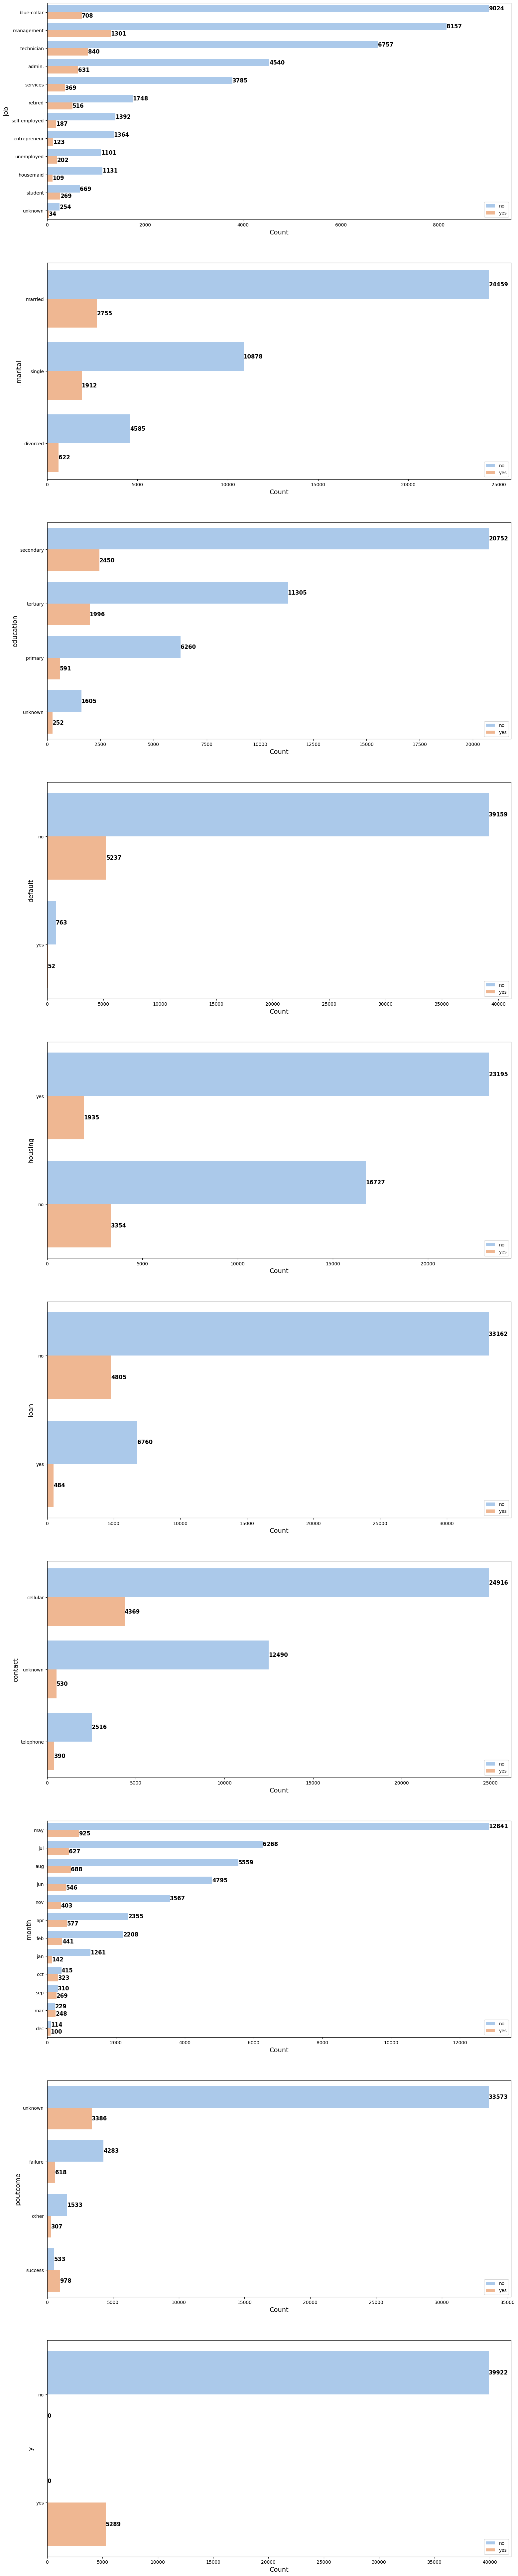

In [31]:

plt.figure(figsize=(18,120))
for idx, col in enumerate(df[cats]):
    plt.subplot(12,1,idx + 1)
    ax = sns.countplot(data = df, y = df[col], hue = df['y'], palette="pastel",
                       order = df[col].value_counts().index);
    plt.ylabel(col, fontsize = 14)
    plt.xlabel('Count', fontsize = 14)
    for col in ax.containers:
        ax.bar_label(col, weight = 'bold', fontsize = 12)
    plt.legend(loc = 'lower right')

#### DATA EXPLORATION (MAS ROI)

## Relationship to Target Variable

### Job

In [32]:
pivot_job = pd.pivot_table(df,
                           index = ['job'],
                           columns=['y'],
                           aggfunc = {"job" : "count"}
                          ).reset_index()

pivot_job.columns = ["Job", "Do not deposit", "Deposit"]

In [33]:
pivot_job["Deposit"].sum()+pivot_job["Do not deposit"].sum()

45211

In [34]:
pivot_job["Percent who deposit"] = (pivot_job["Deposit"]/(pivot_job["Deposit"]+pivot_job["Do not deposit"])*100)

In [35]:
pivot_job.sort_values(by=['Percent who deposit'], ascending=False).reset_index()

,index,Job,Do not deposit,Deposit,Percent who deposit
0,8,student,669,269,28.678038
1,5,retired,1748,516,22.791519
2,10,unemployed,1101,202,15.502686
3,4,management,8157,1301,13.755551
4,0,admin.,4540,631,12.202669
5,6,self-employed,1392,187,11.842939
6,11,unknown,254,34,11.805556
7,9,technician,6757,840,11.056996
8,7,services,3785,369,8.883004
9,3,housemaid,1131,109,8.790323


In [36]:
pivot_job.sort_values(by=['Deposit'], ascending=False).reset_index()

,index,Job,Do not deposit,Deposit,Percent who deposit
0,4,management,8157,1301,13.755551
1,9,technician,6757,840,11.056996
2,1,blue-collar,9024,708,7.274969
3,0,admin.,4540,631,12.202669
4,5,retired,1748,516,22.791519
5,7,services,3785,369,8.883004
6,8,student,669,269,28.678038
7,10,unemployed,1101,202,15.502686
8,6,self-employed,1392,187,11.842939
9,2,entrepreneur,1364,123,8.271688


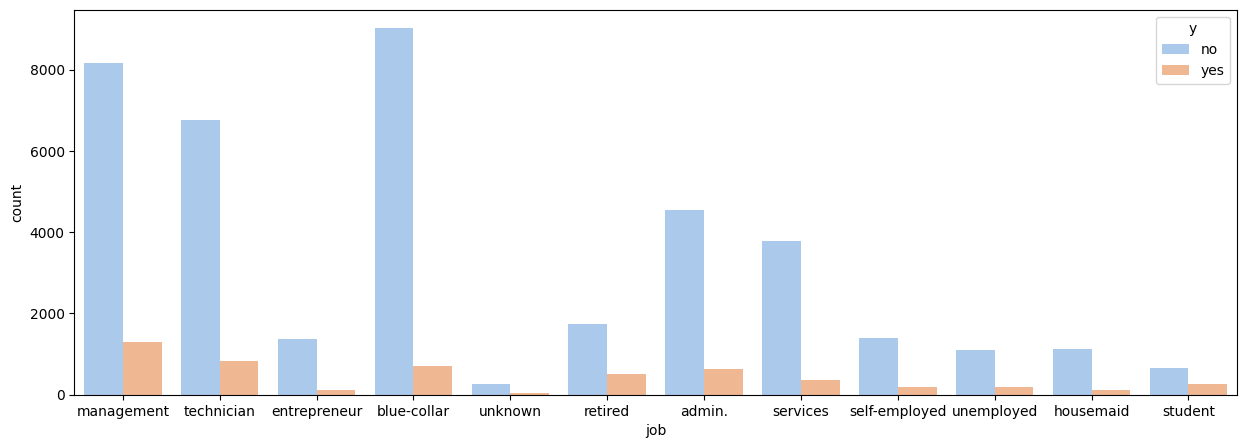

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='job', hue='y', palette="pastel")
plt.show()

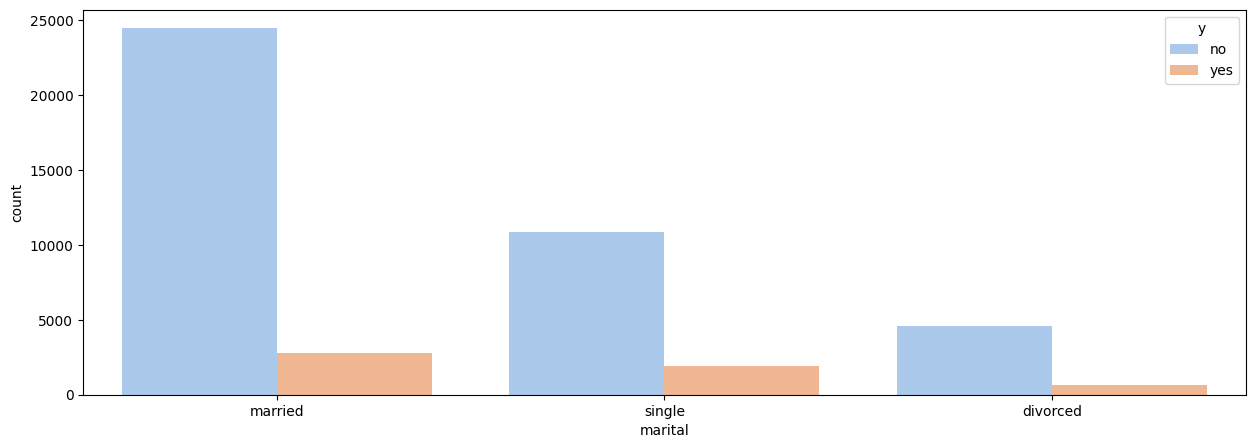

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='marital', hue='y', palette="pastel")
plt.show()

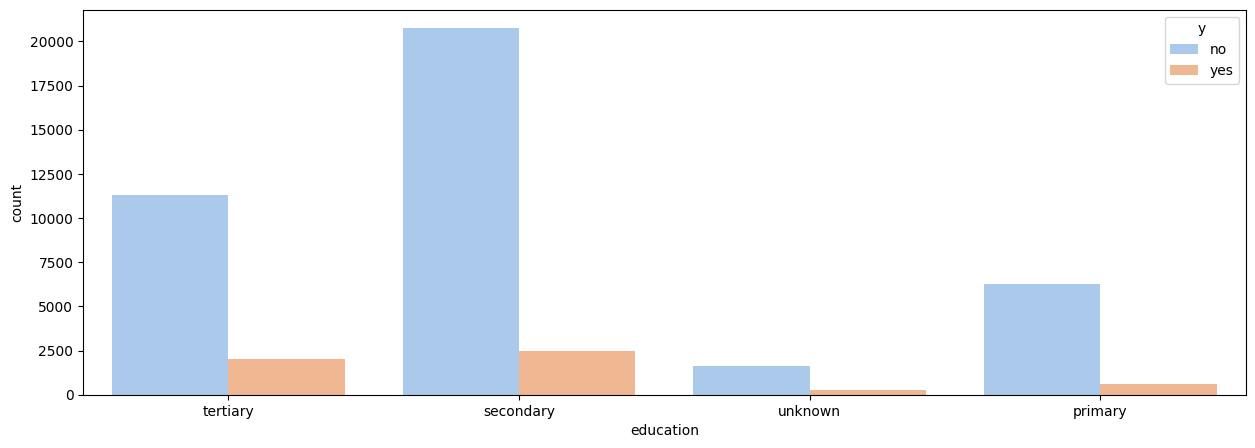

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='education', hue='y', palette="pastel")
plt.show()

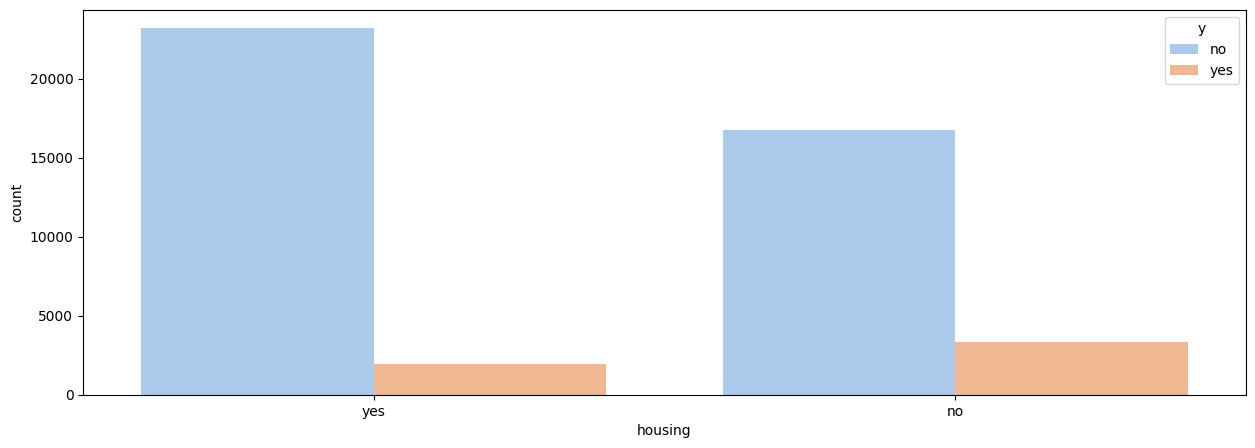

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='housing', hue='y', palette="pastel")
plt.show()

### Marital

In [41]:
pivot_marital = pd.pivot_table(df,
                           index = ['marital'],
                           columns=['y'],
                           aggfunc = {"marital" : "count"}
                          ).reset_index()

pivot_marital.columns = ["Married?", "Do not deposit", "Deposit"]
pivot_marital["Percent who deposit"] = (pivot_marital["Deposit"]/(pivot_marital["Deposit"]+pivot_marital["Do not deposit"])*100)

pivot_marital["Deposit"].sum()+pivot_marital["Do not deposit"].sum()

45211

In [42]:
pivot_marital.sort_values(by=['Percent who deposit'], ascending=False).reset_index()

,index,Married?,Do not deposit,Deposit,Percent who deposit
0,2,single,10878,1912,14.949179
1,0,divorced,4585,622,11.945458
2,1,married,24459,2755,10.123466


### Education

In [43]:
pivot_education = pd.pivot_table(df,
                           index = ['education'],
                           columns=['y'],
                           aggfunc = {"education" : "count"}
                          ).reset_index()

pivot_education.columns = ["Education", "Do not deposit", "Deposit"]
pivot_education["Percent who deposit"] = (pivot_education["Deposit"]/(pivot_education["Deposit"]+pivot_education["Do not deposit"])*100)

pivot_education["Deposit"].sum()+pivot_education["Do not deposit"].sum()

45211

In [44]:
pivot_education.sort_values(by=['Percent who deposit'], ascending=False).reset_index()

,index,Education,Do not deposit,Deposit,Percent who deposit
0,2,tertiary,11305,1996,15.006390
1,3,unknown,1605,252,13.570275
2,1,secondary,20752,2450,10.559435
3,0,primary,6260,591,8.626478


### Housing

In [45]:
pivot_housing = pd.pivot_table(df,
                           index = ['housing'],
                           columns=['y'],
                           aggfunc = {"housing" : "count"}
                          ).reset_index()

pivot_housing.columns = ["Housing Loan", "Do not deposit", "Deposit"]
pivot_housing["Percent who deposit"] = (pivot_housing["Deposit"]/(pivot_housing["Deposit"]+pivot_housing["Do not deposit"])*100)

pivot_housing["Deposit"].sum()+pivot_housing["Do not deposit"].sum()

45211

In [46]:
pivot_housing.sort_values(by=['Percent who deposit'], ascending=False).reset_index()

,index,Housing Loan,Do not deposit,Deposit,Percent who deposit
0,0,no,16727,3354,16.702355
1,1,yes,23195,1935,7.699960


### Loan

In [47]:
pivot_loan = pd.pivot_table(df,
                           index = ['loan'],
                           columns=['y'],
                           aggfunc = {"loan" : "count"}
                          ).reset_index()

pivot_loan.columns = ["Loan", "Do not deposit", "Deposit"]
pivot_loan["Percent who deposit"] = (pivot_loan["Deposit"]/(pivot_loan["Deposit"]+pivot_loan["Do not deposit"])*100)

pivot_loan["Deposit"].sum()+pivot_loan["Do not deposit"].sum()

45211

In [48]:
pivot_loan.sort_values(by=['Percent who deposit'], ascending=False).reset_index()

,index,Loan,Do not deposit,Deposit,Percent who deposit
0,0,no,33162,4805,12.655727
1,1,yes,6760,484,6.681391


<Axes: xlabel='loan', ylabel='count'>

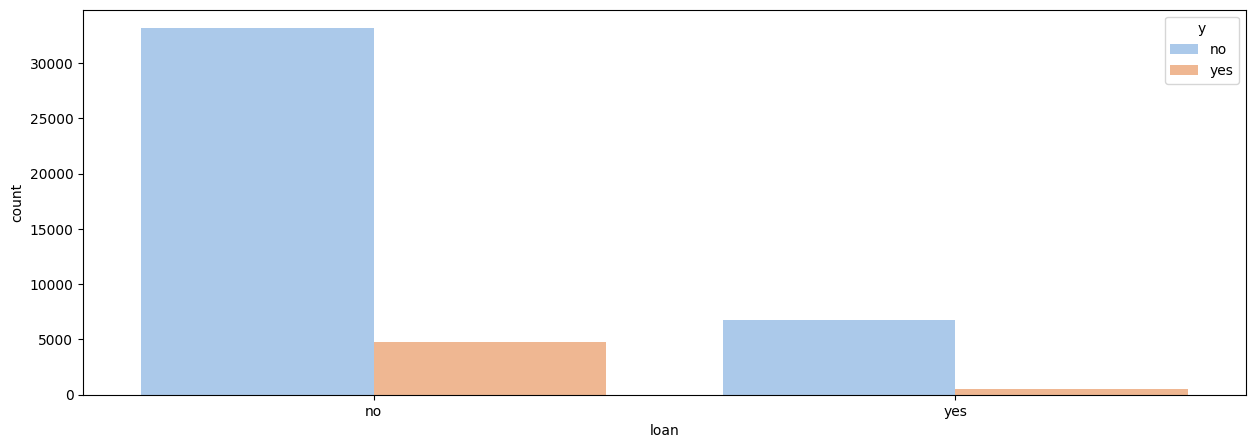

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='loan', hue='y', palette="pastel")